# **EDA Task**
**Penguin Dataset Analyse** 🐧

By: Sediqa, Aylin and Ayush

## **Imports and Dataset loading**

Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Set path and read (load) Dataset with pandas

In [4]:
path = "https://raw.githubusercontent.com/aylinnyma/Scientific_Programming/refs/heads/main/penguins.csv"
df = pd.read_csv(path)

## **Basic EDA**

Display first 10 elements of dataset as a pandas dataframe to ensure it was succesfully loaded, and to have a general overview

In [5]:
df.shape

(344, 7)

In [6]:
df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


Show dataframe specific information

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    str    
dtypes: float64(4), str(3)
memory usage: 18.9 KB


**First impressions:**


* there are 7 columns
* the values' types are float and object, presumably `String` type objects
* there is inconsistency in the values of some columns that will need to be normalized for its analysis (the idea is that all columns should contain 344 non-null values)

In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## **Data cleaning**

Detect rows with missing data per columns with missing values

In [9]:
df[df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]].isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


We get rid of the data that is not useful

In [10]:
df_clean= df.dropna(subset=['bill_length_mm', 'flipper_length_mm']).copy()

In [11]:
df_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [12]:
df_clean['sex'] = df_clean['sex'].fillna('Unknown')

In [13]:
df_clean.head(15)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,Unknown
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,Unknown
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,Unknown


In [14]:
print(df_clean.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [15]:
print(df_clean['species'].value_counts())

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


## **Visualization**

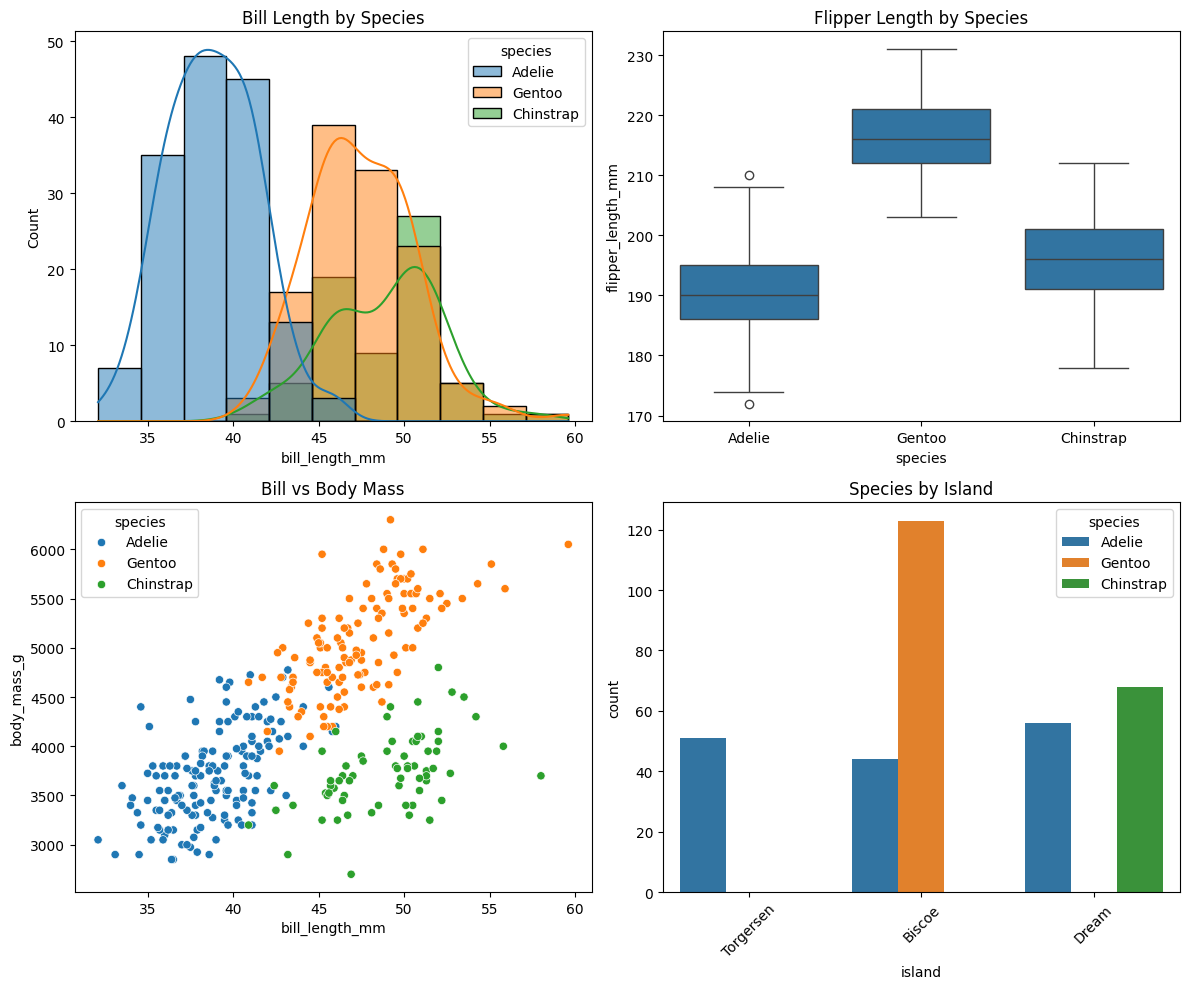

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df_clean, x='bill_length_mm', hue='species',
kde=True, ax=ax[0,0])
ax[0,0].set_title('Bill Length by Species')

sns.boxplot(
    data=df_clean,
    x='species',
    y='flipper_length_mm',
    ax=ax[0,1]
)
ax[0,1].set_title('Flipper Length by Species')

sns.scatterplot(data=df_clean, x='bill_length_mm',
y='body_mass_g', hue='species', ax=ax[1,0])
ax[1,0].set_title('Bill vs Body Mass')

sns.countplot(data=df_clean, x='island', hue='species',
ax=ax[1,1])
ax[1,1].set_title('Species by Island') # Rotate if overlapping:
ax[1,1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## **Hypothesis**

### **Is bill shape (length, depth) a more reliable way to identify species than body mass?**

C:\Users\Ayush.Diyundi\AppData\Local\Temp\ipykernel_33536\1345952078.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(species_data, labels=df['species'].unique())


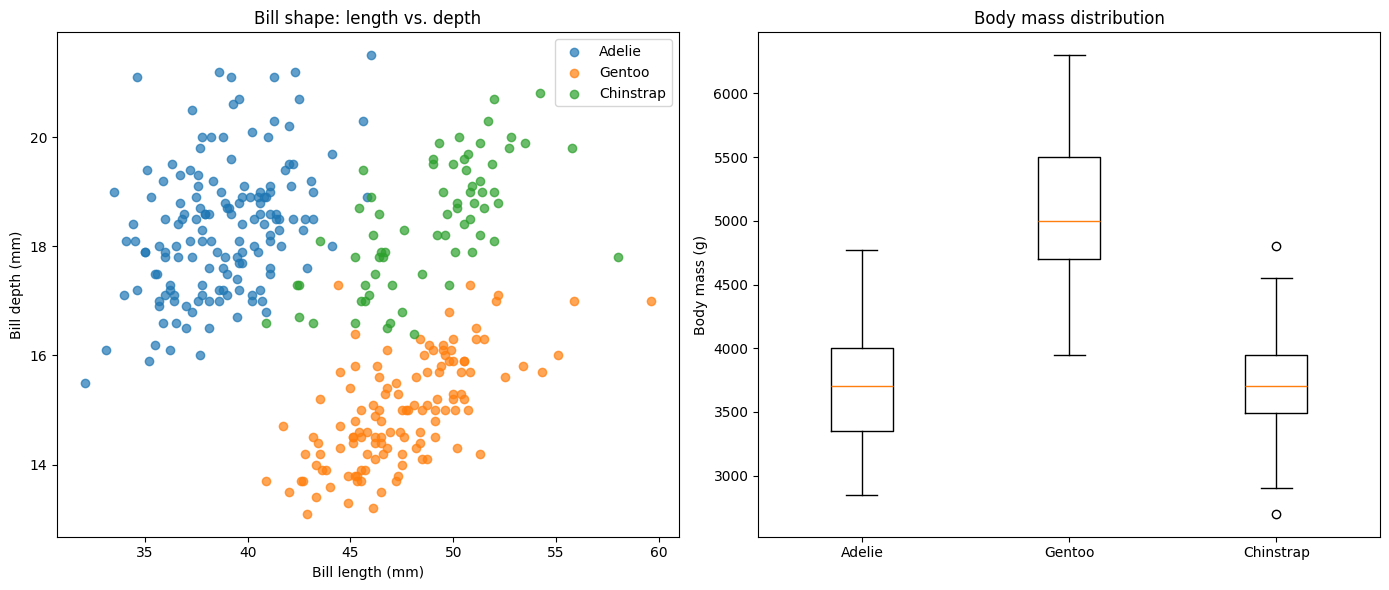

In [17]:
# Calculate the 'bill ratio' (helpful for the 'shape')
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

# Setup the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bill shape (scatter)
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax1.scatter(subset['bill_length_mm'], subset['bill_depth_mm'], label=species, alpha=0.7)

ax1.set_title('Bill shape: length vs. depth')
ax1.set_xlabel('Bill length (mm)')
ax1.set_ylabel('Bill depth (mm)')
ax1.legend()

# Body mass (distribution)
species_data = [df[df['species'] == s]['body_mass_g'].dropna() for s in df['species'].unique()]
ax2.boxplot(species_data, labels=df['species'].unique())

ax2.set_title('Body mass distribution')
ax2.set_ylabel('Body mass (g)')

plt.tight_layout()
plt.show()

In the bill shape scatterplot, colors don't really mix together, they rather form three distinct islands. This means, bill shape is a strong "fingerprint."

In the body mass boxplot, we notice the boxes are not at the same height. We see that Gentoo penguins are much heavier, but Adelie and Chinstrap penguins have similar body mass, which means it's a poor differentiator for those two.

While body mass shows us if a penguin is "large" (likely a Gentoo), the bill dimensions are distinct across all three species. **Therefore, the bill shape is a more reliable feature we can use to identify species.**

### **Can the sex of a penguin be predicted by the bill and/or flipper length?**

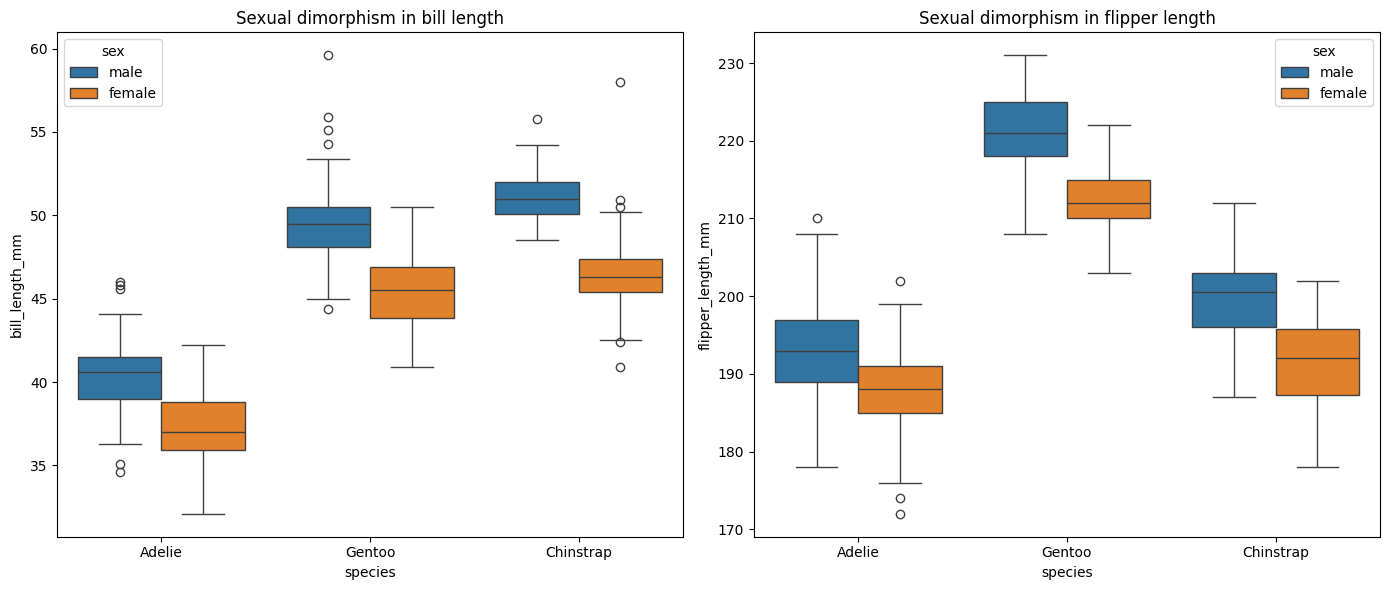

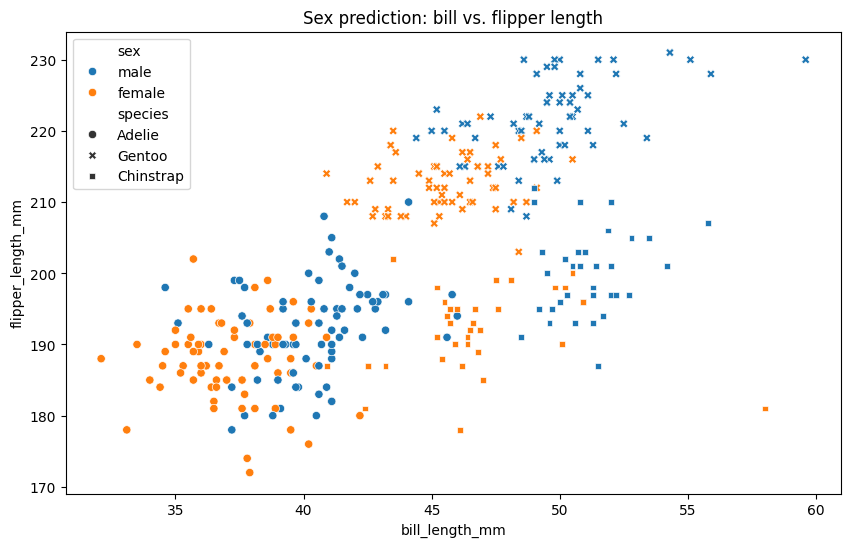

In [18]:
# Grouped Boxplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bill length separation
sns.boxplot(x='species', y='bill_length_mm', hue='sex', data=df, ax=ax1)
ax1.set_title('Sexual dimorphism in bill length')

# Flipper length separation
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df, ax=ax2)
ax2.set_title('Sexual dimorphism in flipper length')

plt.tight_layout()
plt.savefig('sex_dimorphism.png')

# Scatter plot (combined features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='sex', style='species', data=df)
plt.title('Sex prediction: bill vs. flipper length')
plt.savefig('sex_prediction_scatter.png')

* Comparing the **bill length** alone has a **strong** predict power. Since within each species, males have significantly longer bills on average. There is some overlap, but it is a very reliable indicator.

* By comparing the **flipper length**, we can have a **moderate** predictive power. We can see that while males have longer flippers, the overlap between sexes is usually greater than it is for bill length.

* When combined this **both** feaure we have a **high** predictive power. Using both features (as seen in a scatter plot) provides the best "separation line" to classify males vs. females.

### **Does having bigger flippers, automatically implies having more body mass?**

A scatter plot with a regression line was the best way to prove this. If the dots hug the line tightly, then the implication is strong, if they are scattered, then the relationship is loose.



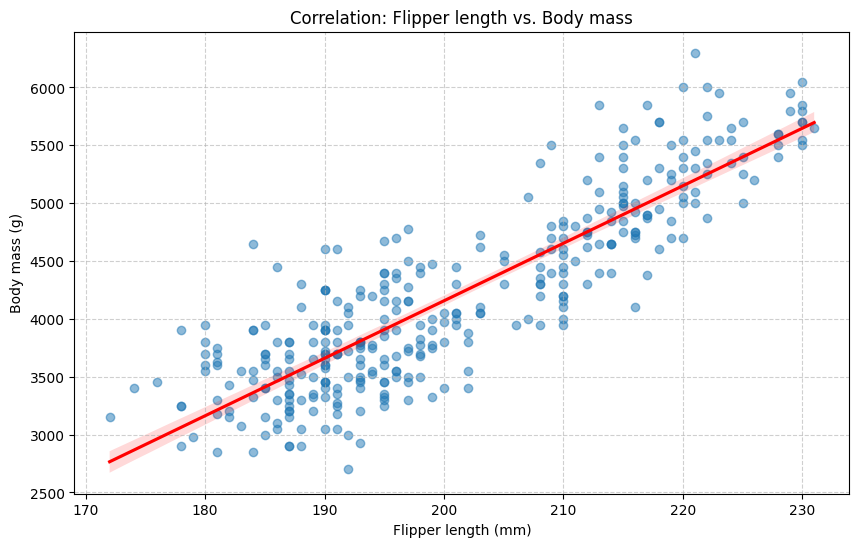

In [19]:
plt.figure(figsize=(10, 6))

# Using regplot to show the trend line and the scatter of points
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Correlation: Flipper length vs. Body mass')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

To go beyond than just looking at this graph, and making conclusions based on what we see, we used Pearson’s Correlation Coefficient($r$). This value ranges from -1 to 1, where 1 is a perfect positive relationship

In [20]:
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])
print(f"The Pearson correlation coefficient is: {correlation:.2f}")

The Pearson correlation coefficient is: 0.87


Since $r > 0.8$, we can conclude there is a very strong relationship. Having bigger flippers almost always implies more mass. This means flipper length is an excellent predictor of mass, but considering the differences among species and their features, it also means we can't perfectly guess mass based *only* on flipper size

### **All the penguins living in the same island, share the same features (bill_length, bill_depth, flipper_length)**

The most effective way to display this is to first create a grid where each column is an Island, where we will see if the physical features are uniform or if they split into different groups

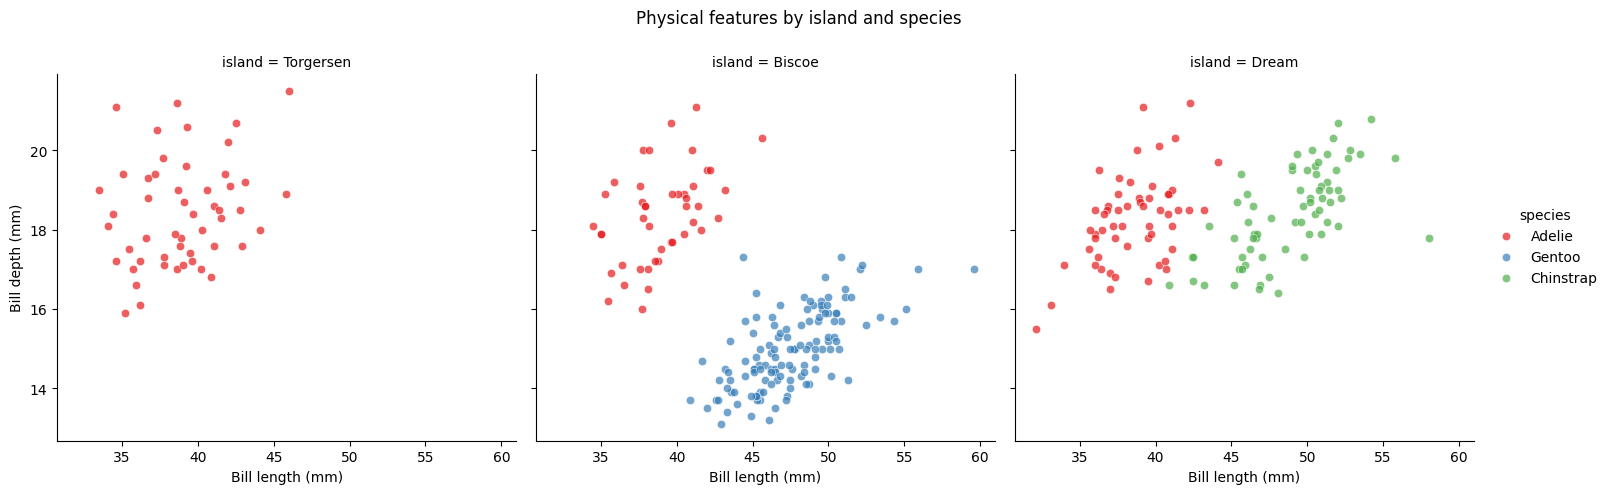

In [21]:
# FacetGrid to compare islands
g = sns.FacetGrid(df, col="island", hue="species", palette="Set1", height=5)
g.map(sns.scatterplot, "bill_length_mm", "bill_depth_mm", alpha=0.7)

g.add_legend()
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Physical features by island and species')
plt.show()

We can use an statistical approach, and use groupby to check the variance, this means if the standard deviation (the spread) of features on an island is small or large (uniform or diverse) and have a more accurate analysis

In [22]:
# Standard deviation of features per island
island_diversity = df.groupby('island')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].std()
print(island_diversity)

           bill_length_mm  bill_depth_mm  flipper_length_mm
island                                                     
Biscoe           4.772731       1.820721          14.142268
Dream            5.953527       1.133116           7.507366
Torgersen        3.025318       1.339447           6.232238


* As we can see, islands like Biscoe and Dream have very high variance. This is because multiple species (like Adélie and Gentoo) live there. They probably share the same climate and food sources, yet their bills and flippers remain completely different

* We also notice that only Torgersen island appears somewhat uniform, but that is simply because only one species (Adélie) lives there in this dataset

* Therefore, we can conclude this claim is **False**. Penguins living on the same island do not share the same features, since species identity is a much stronger predictor of physical traits than the island they inhabit

## **Bonus: Correlations**

In [23]:
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr = df_clean[numeric_cols].corr()

### Heatmap

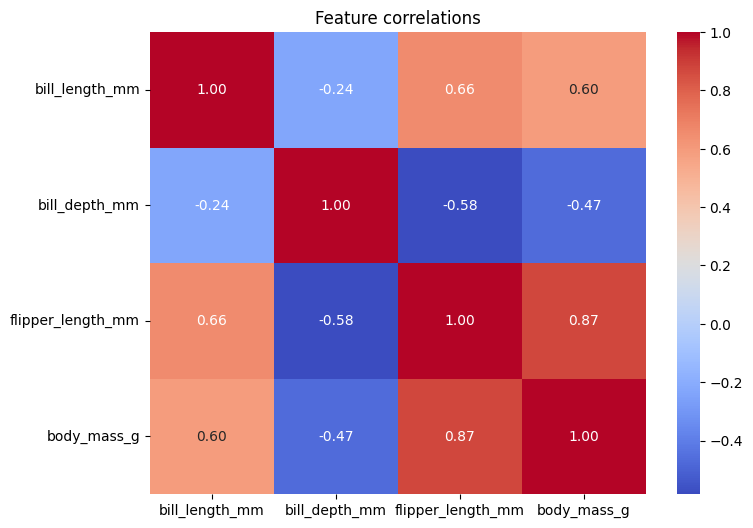

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature correlations')
plt.show()


### Pairplot

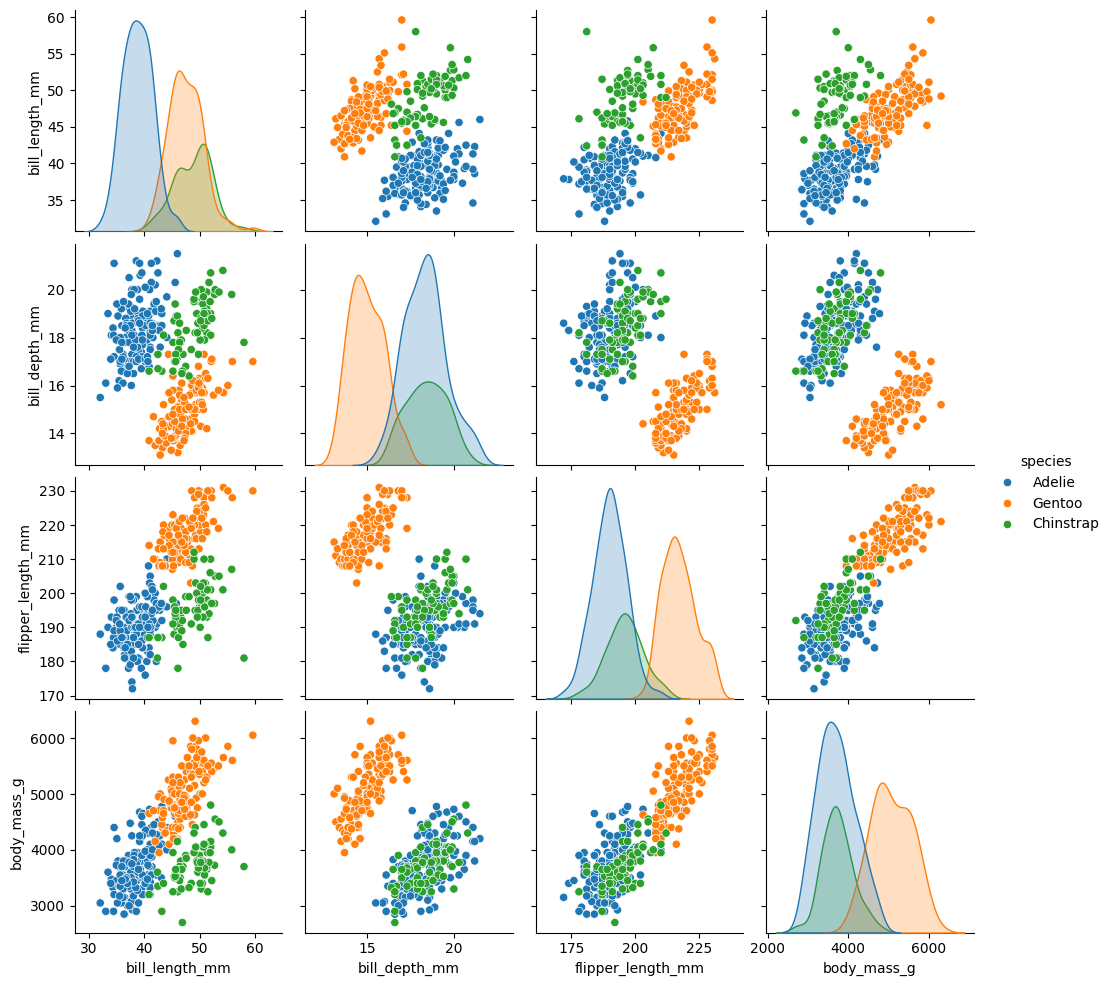

In [25]:
sns.pairplot(df_clean, hue='species')
plt.show()